- 说明：
    - 本主题主要是说明渲染，不是专门说明mermaid语法的。

# mermaid环境准备

## 安装

- 安装mermaid需要安装d3模块。下面是安装脚本：

```shell
    npm install d3@^4.13.0  --save
    npm install mermaid --save
```

- d3是3D可视化有名的模块。

## 模块文件

- mermaid.js

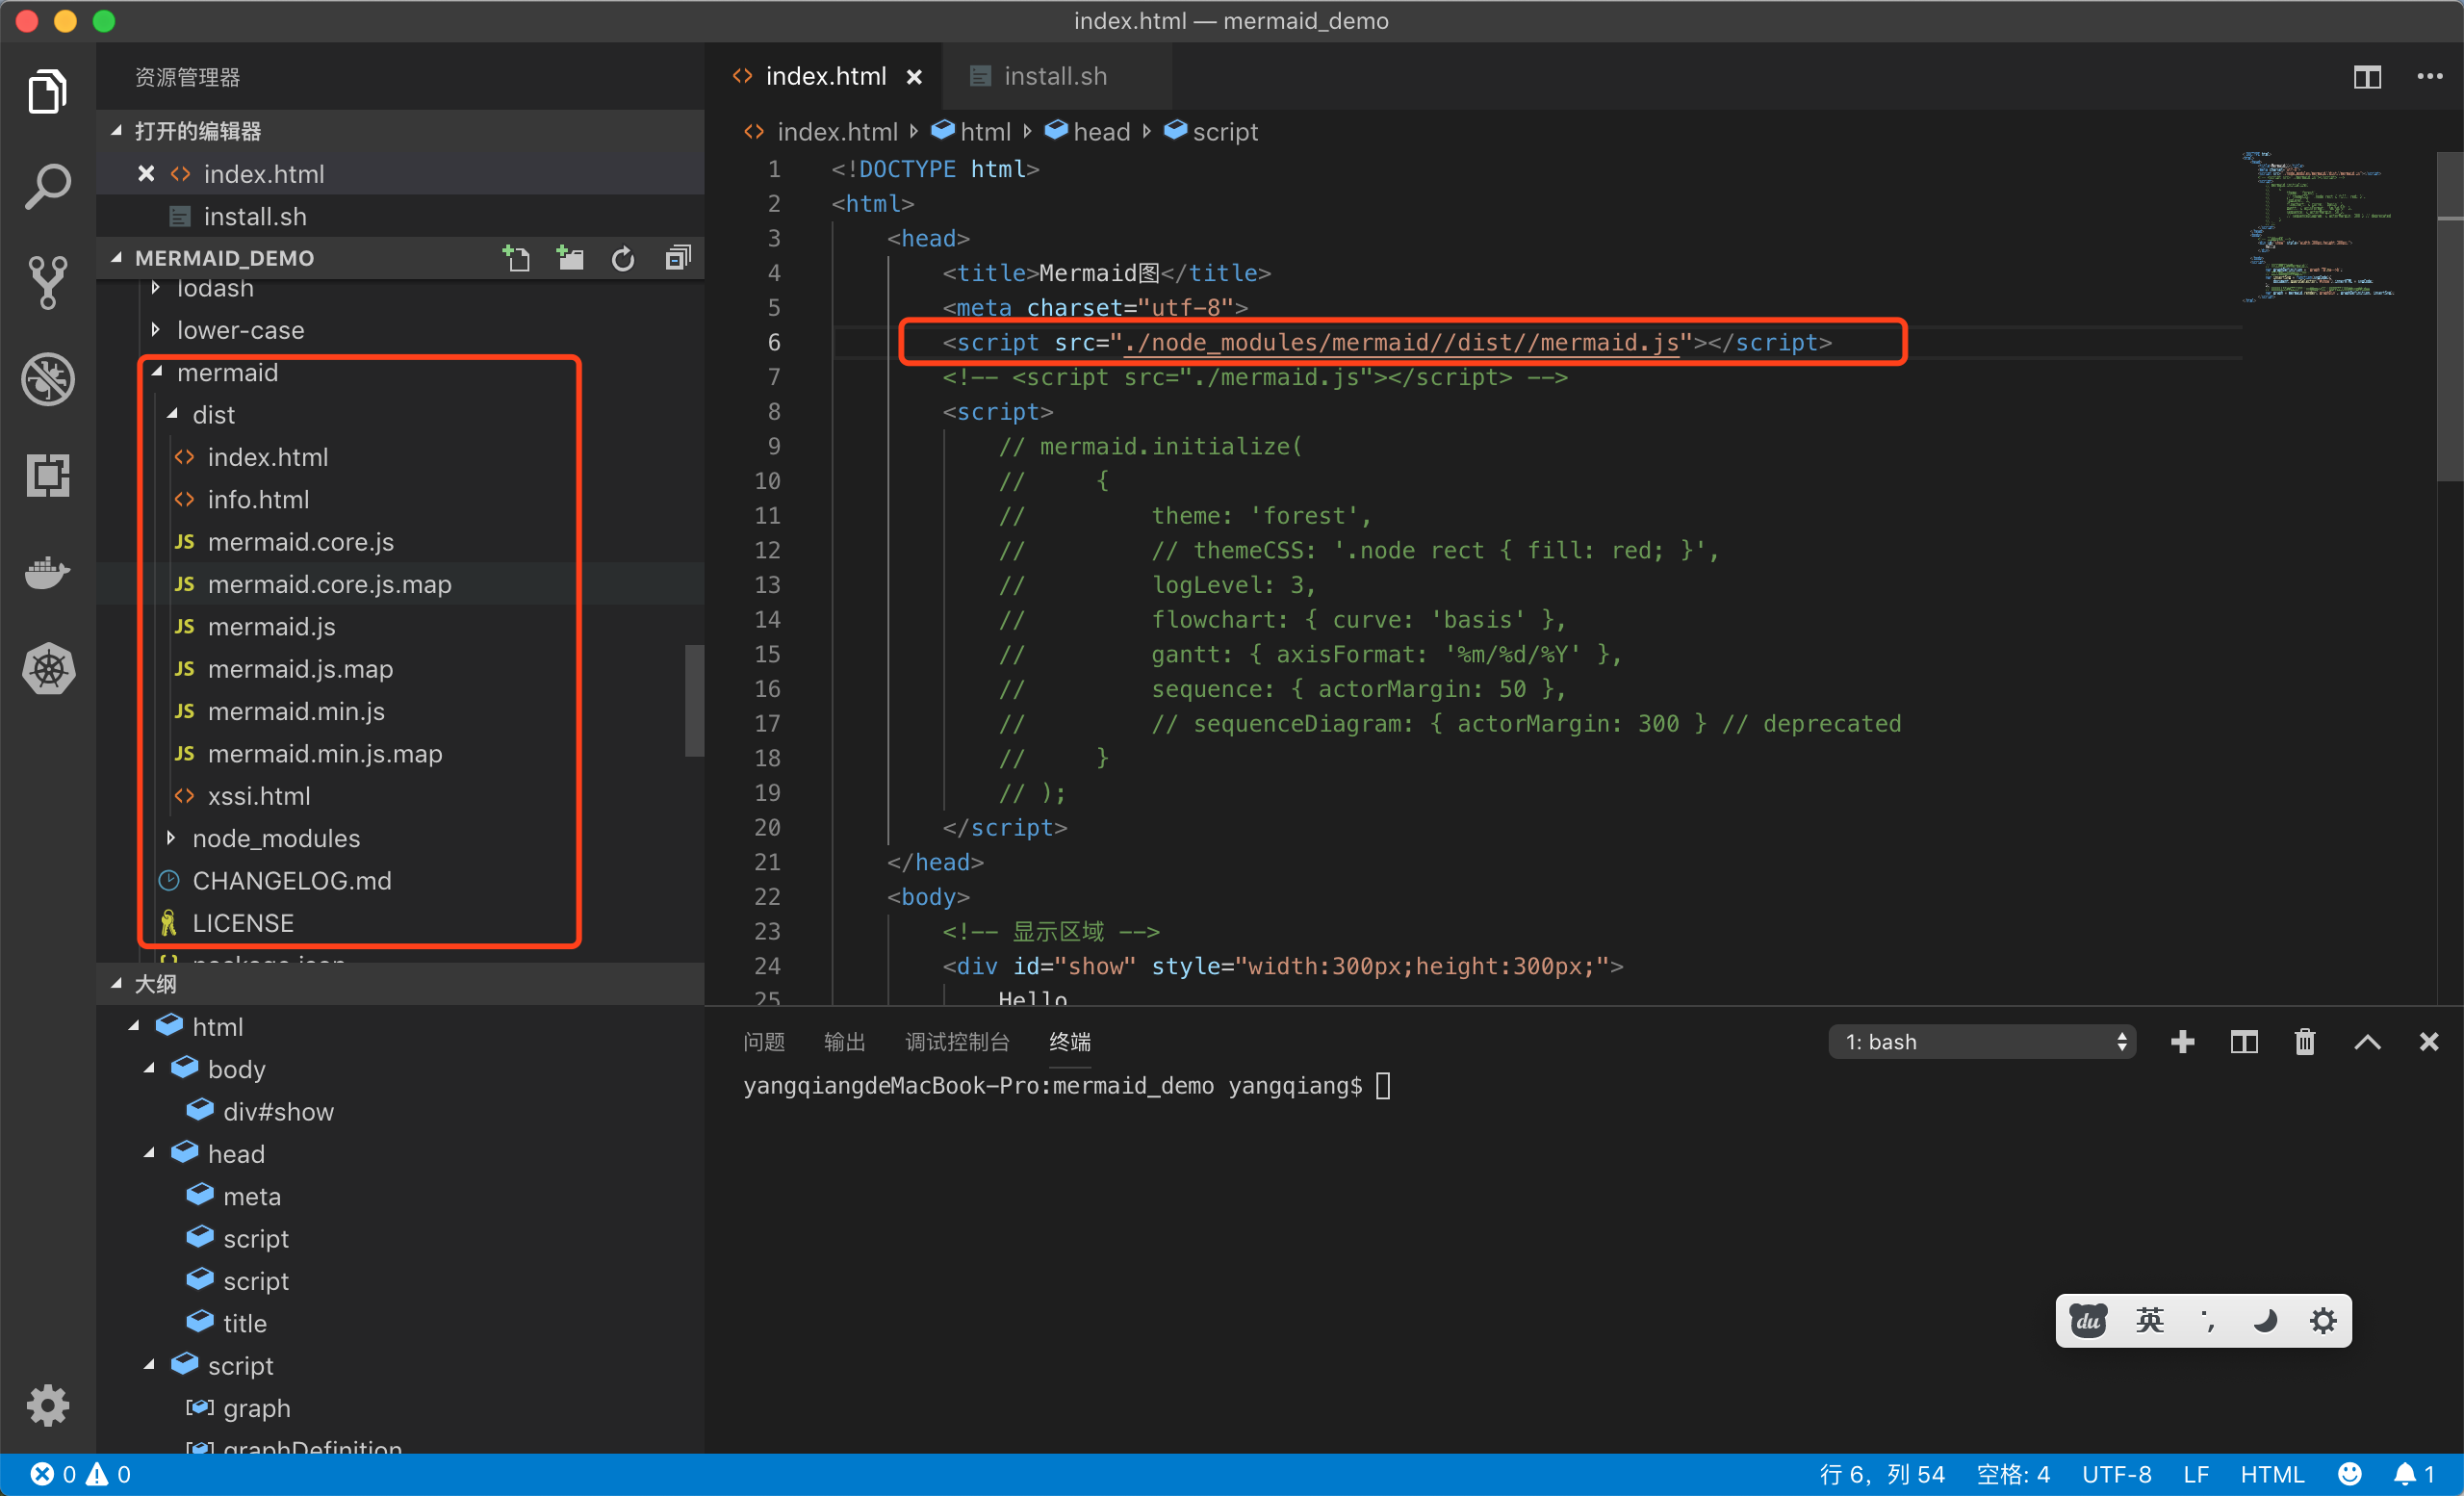

# mermaid编程模式

- mermaid渲染比较单一，直接转换为Web常见的展示方式svg：
    - 包含svg的样式；
    - 包含svg标记；

- 编程模式采用回调方式，一旦渲染成功，就调用回调函数进行后继处理：显示或者存储为文件，下面使用代码直接说明：
    1. 准备一个svg显示组件
    2. 实现一个回调函数，处理渲染的svg结果；
    3. 调用meimaid全局对象的函数render实现渲染。
        - 渲染render返回渲染结果，如果传递了回调函数，渲染结果也会传递给回调函数。

## 回调模式

```HTML
    <body>
        <!-- 显示区域 -->
        <div id="show" style="width:300px;height:300px;">
            Hello
        </div>

    </body>
    <script>
        // 需要绘制的Mermaid图
        var graphDefinition = 'graph TB\na-->b';   
        // 渲染完成后的回调函数
        var insertSvg = function(svgCode){
            document.querySelector("#show").innerHTML = svgCode;
        };
        // 非常简单的渲染函数（第一个参数指定渲染后的svg的id）
        var graph = mermaid.render('graphDiv', graphDefinition, insertSvg);

    </script>
```

## 返回模式

```HTML
    <body>
        <!-- 显示区域 -->
        <div id="show" style="width:300px;height:300px;">
            Hello
        </div>

    </body>
    <script>
        // 需要绘制的Mermaid图
        var graphDefinition = 'graph TB\na-->b';   
        // 非常简单的渲染函数（第一个参数指定渲染后的svg的id）
        var graph = mermaid.render('graphDiv', graphDefinition);
        document.querySelector("#show").innerHTML = graph;
    </script>
```

- 绘制的流程图效果

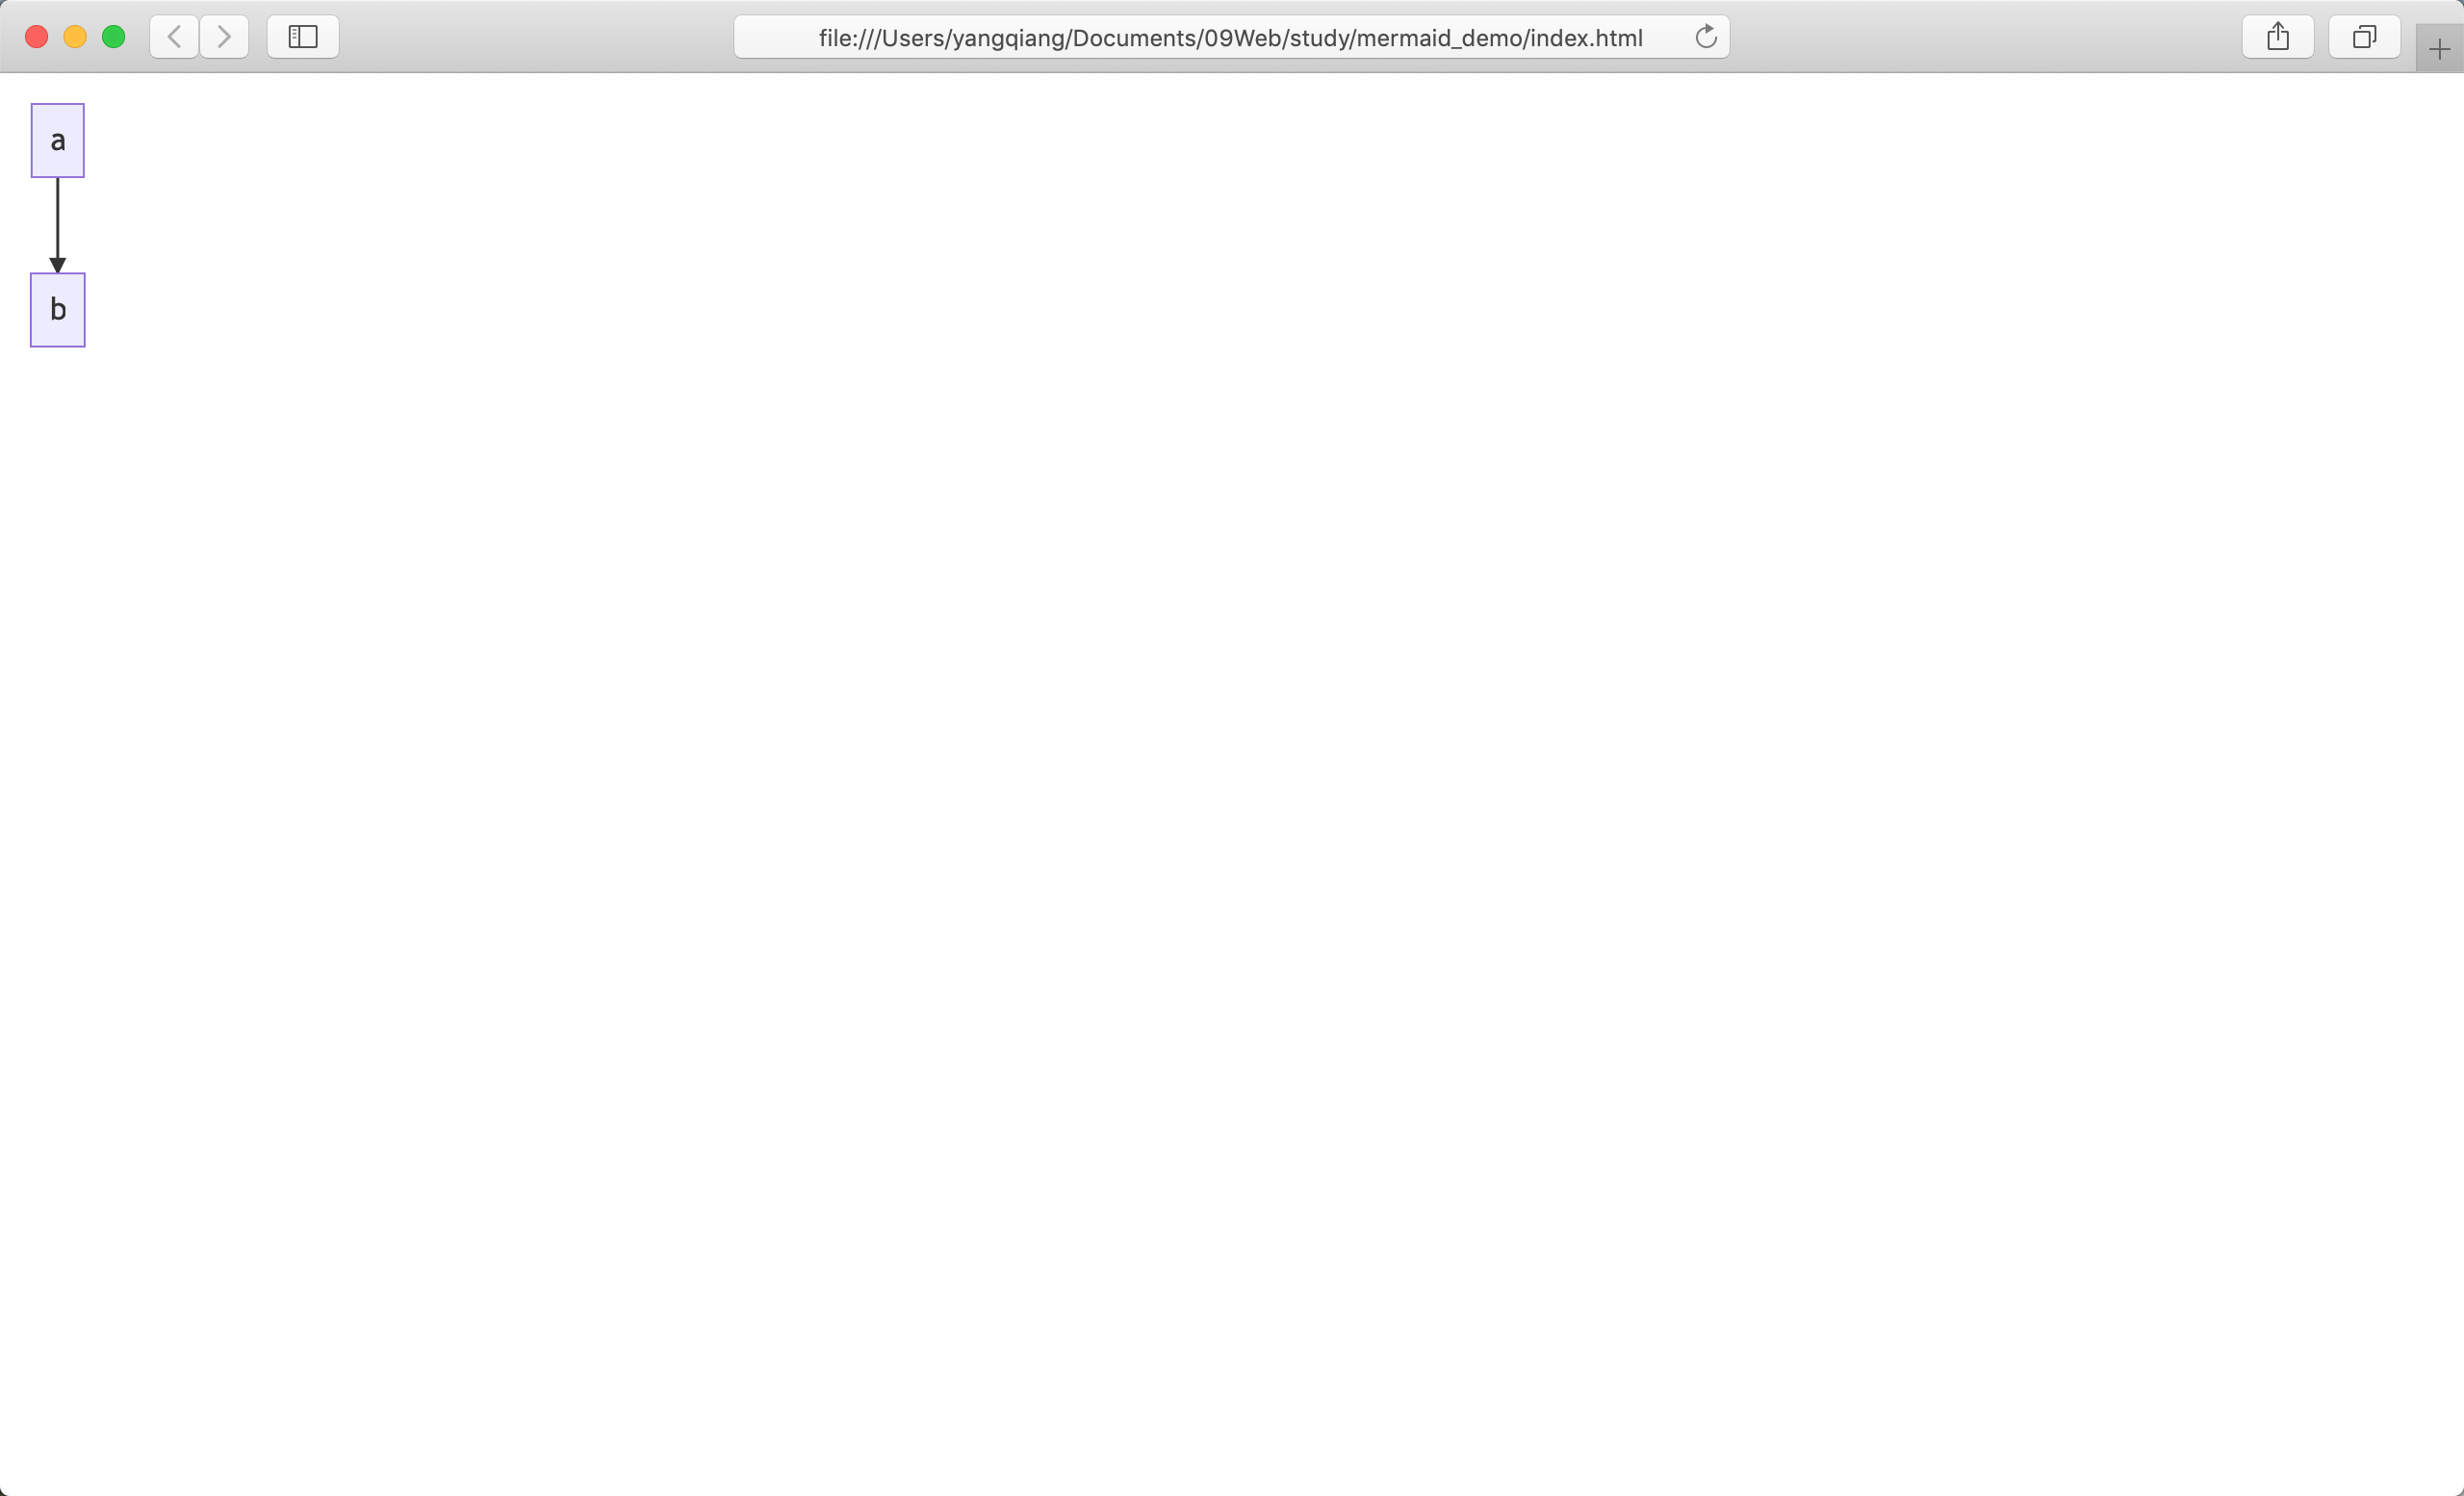

## 关于mermaid的选项设置

- 为了显示不同的风格，可以通过选项设置风格
    - 并可以分别设置不同图形的风格
        1. 流程图
        2. 甘特图
        3. 类图与时序图（UML2.0）

```HTML

        <script src="./node_modules/mermaid//dist//mermaid.js"></script>
        <!-- <script src="./mermaid.js"></script> -->
        <script>
            mermaid.initialize(
                {
                    theme: 'forest',
                    // themeCSS: '.node rect { fill: red; }',
                    logLevel: 3,
                    flowchart: { curve: 'basis' },
                    gantt: { axisFormat: '%m/%d/%Y' },
                    sequence: { actorMargin: 50 },
                    // sequenceDiagram: { actorMargin: 300 } // deprecated
                }
            );
        </script>

```

- 森林主题的风格

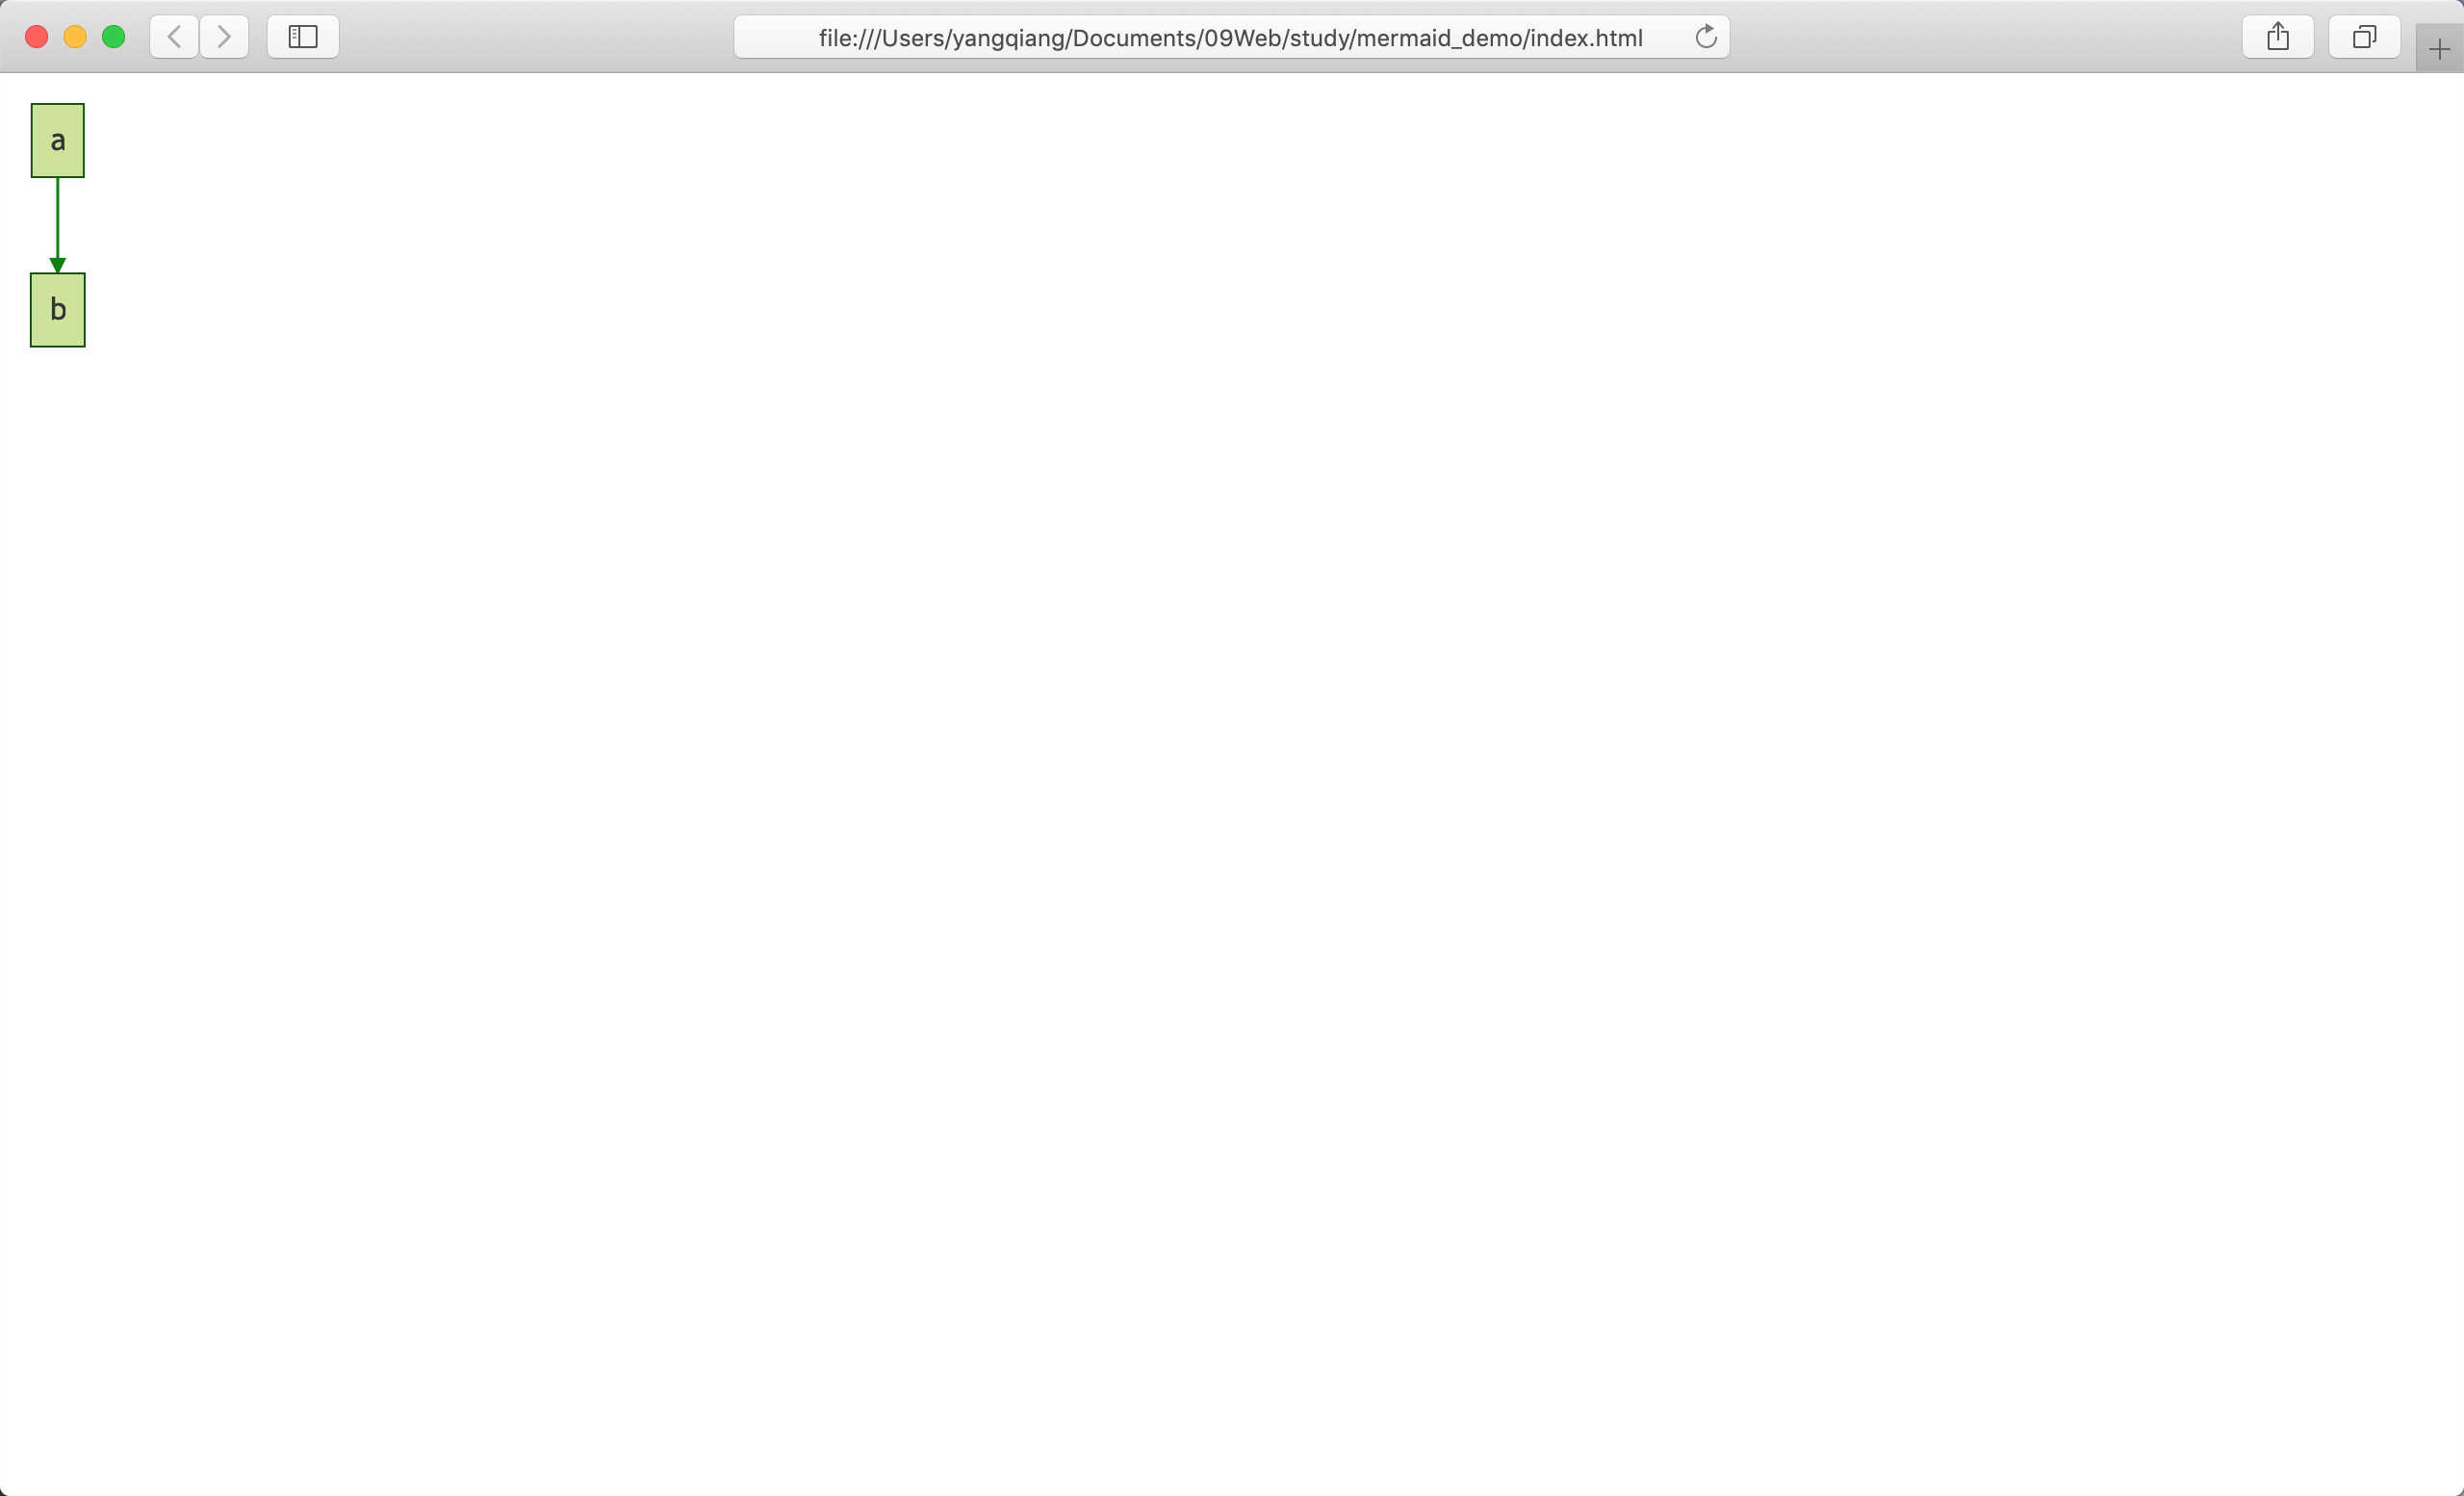

# 在Vue中使用

- 在Vue中使用各种渲染插件，有两种使用方式：
    - 直接在html中引入模块，这是传统方式，与传统方式一样使用即可。
    - 使用require与import导入模块，这种方式需要webpack打包，麻烦要多，需要注意编译时与运行时两个方面的差别。
    
- mermaid提供了require使用方式。

## 定理由组件中实现转换

```javascript
<script>
export default{
    name: 'mermaiddemo',
    data: () => {
        // 计算数据
        const mermaid = require('mermaid');
        var graphDefinition = '' ;
        graphDefinition += 'graph LR\n';
        graphDefinition += '流程A--选项1-->流程B\n';
        graphDefinition += '流程A--选项2-->流程C\n';
        graphDefinition += '流程B--输出1-->流程D\n';
        graphDefinition += '流程C--输出1-->流程D\n';
        graphDefinition += '流程D--结果-->流程E\n';

        const graph = mermaid.render('graphDiv', graphDefinition);
        return {
            mermaidgraph: graph,
        };
    },
};
</script>
```

## 使用Vue指令显示转换结果

```HTML
<template>
    <div>
        <section id="show" v-html="mermaidgraph"></section>
    </div>
</template>
```

- 完整的的Vue路由组件代码

```HTML
<template>
    <div>
        <section id="show" v-html="mermaidgraph"></section>
    </div>
</template>
<script>
export default{
    name: 'mermaiddemo',
    data: () => {
        // 计算数据
        const mermaid = require('mermaid');
        var graphDefinition = '' ;
        graphDefinition += 'graph LR\n';
        graphDefinition += '流程A--选项1-->流程B\n';
        graphDefinition += '流程A--选项2-->流程C\n';
        graphDefinition += '流程B--输出1-->流程D\n';
        graphDefinition += '流程C--输出1-->流程D\n';
        graphDefinition += '流程D--结果-->流程E\n';

        const graph = mermaid.render('graphDiv', graphDefinition);
        return {
            mermaidgraph: graph,
        };
    },
};
</script>
<style>
</style>

```

- 运行效果如下：

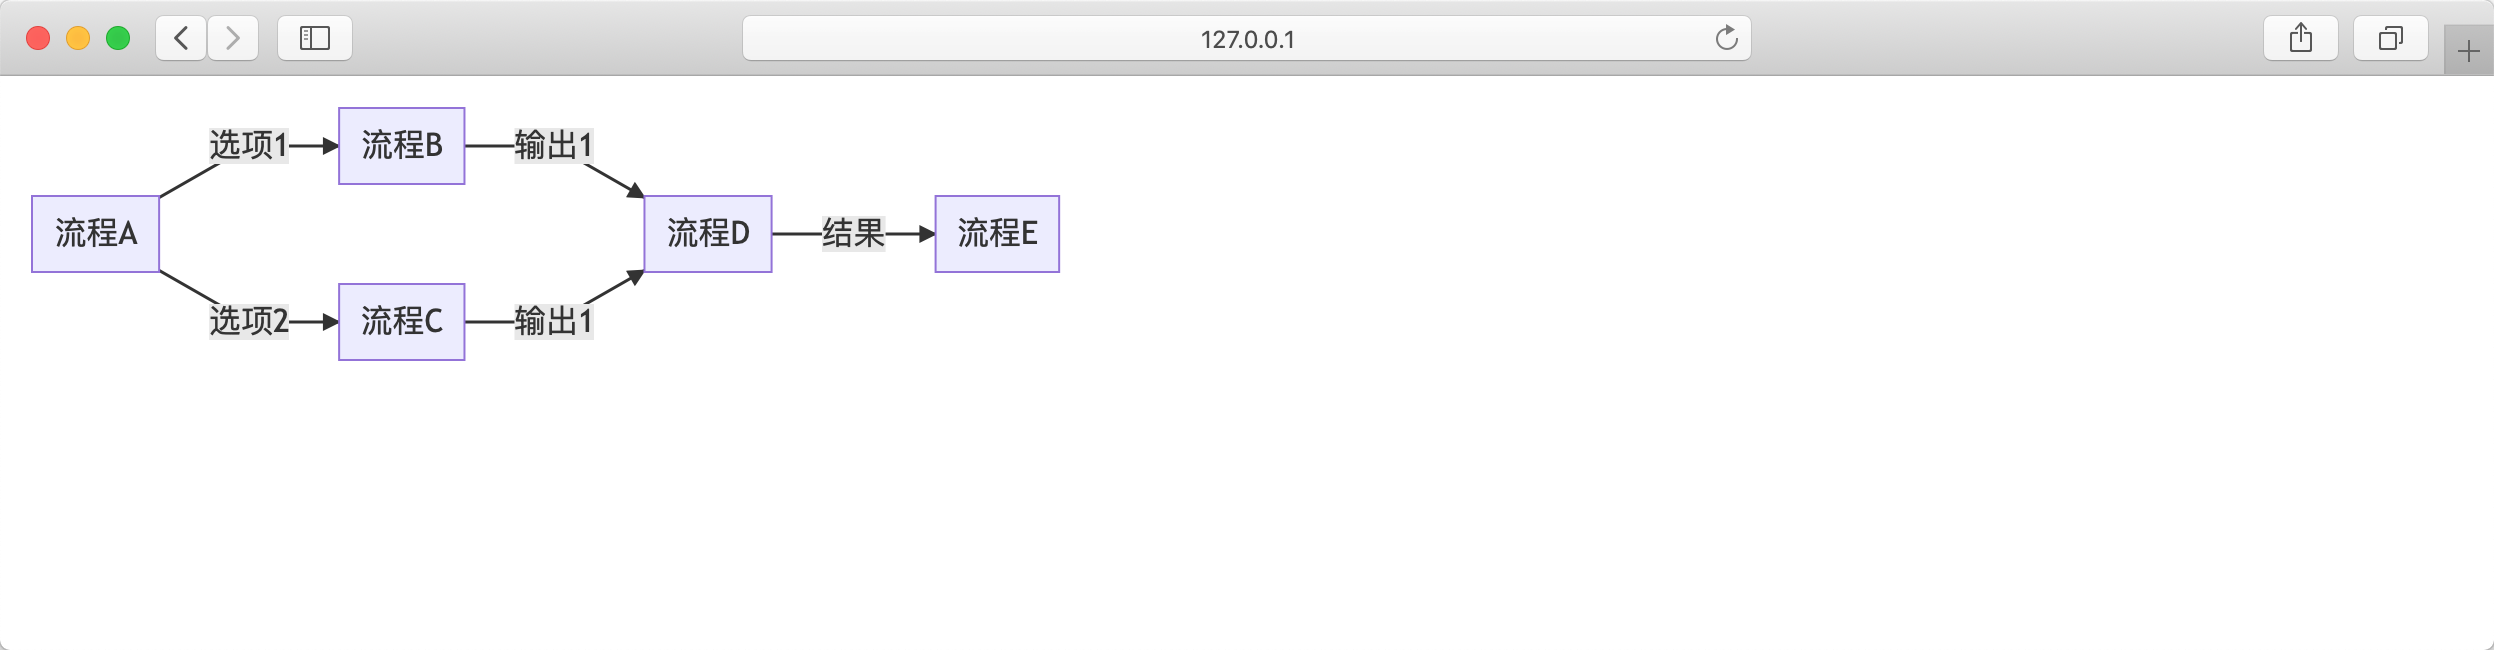

- **注意**
    - 由于MathJax与Mermaid采用独立的样式，容易被全局样式影响，所以对样式的规范显得特别重要。

- Mermaid也提供对整个页面的自动处理

```HTML
<!doctype html>
<html>
<head>
    <title>甘特图</title>
    <meta charset="utf-8">
    <script src="./node_modules/mermaid//dist//mermaid.js"></script>
</head>
<body>

    <div class="mermaid">
        gantt
        title 计划甘特图
        dateFormat  YYYY-MM-DD
        section 第一阶段
        任务一     : a1, 2019-07-18, 20d
        任务二     : after a1  , 10d
        section 第二阶段
        任务三     : 2019-08-20, 12d
        任务四     : 24d
  </div>
</body>

</html>
```

- 效果

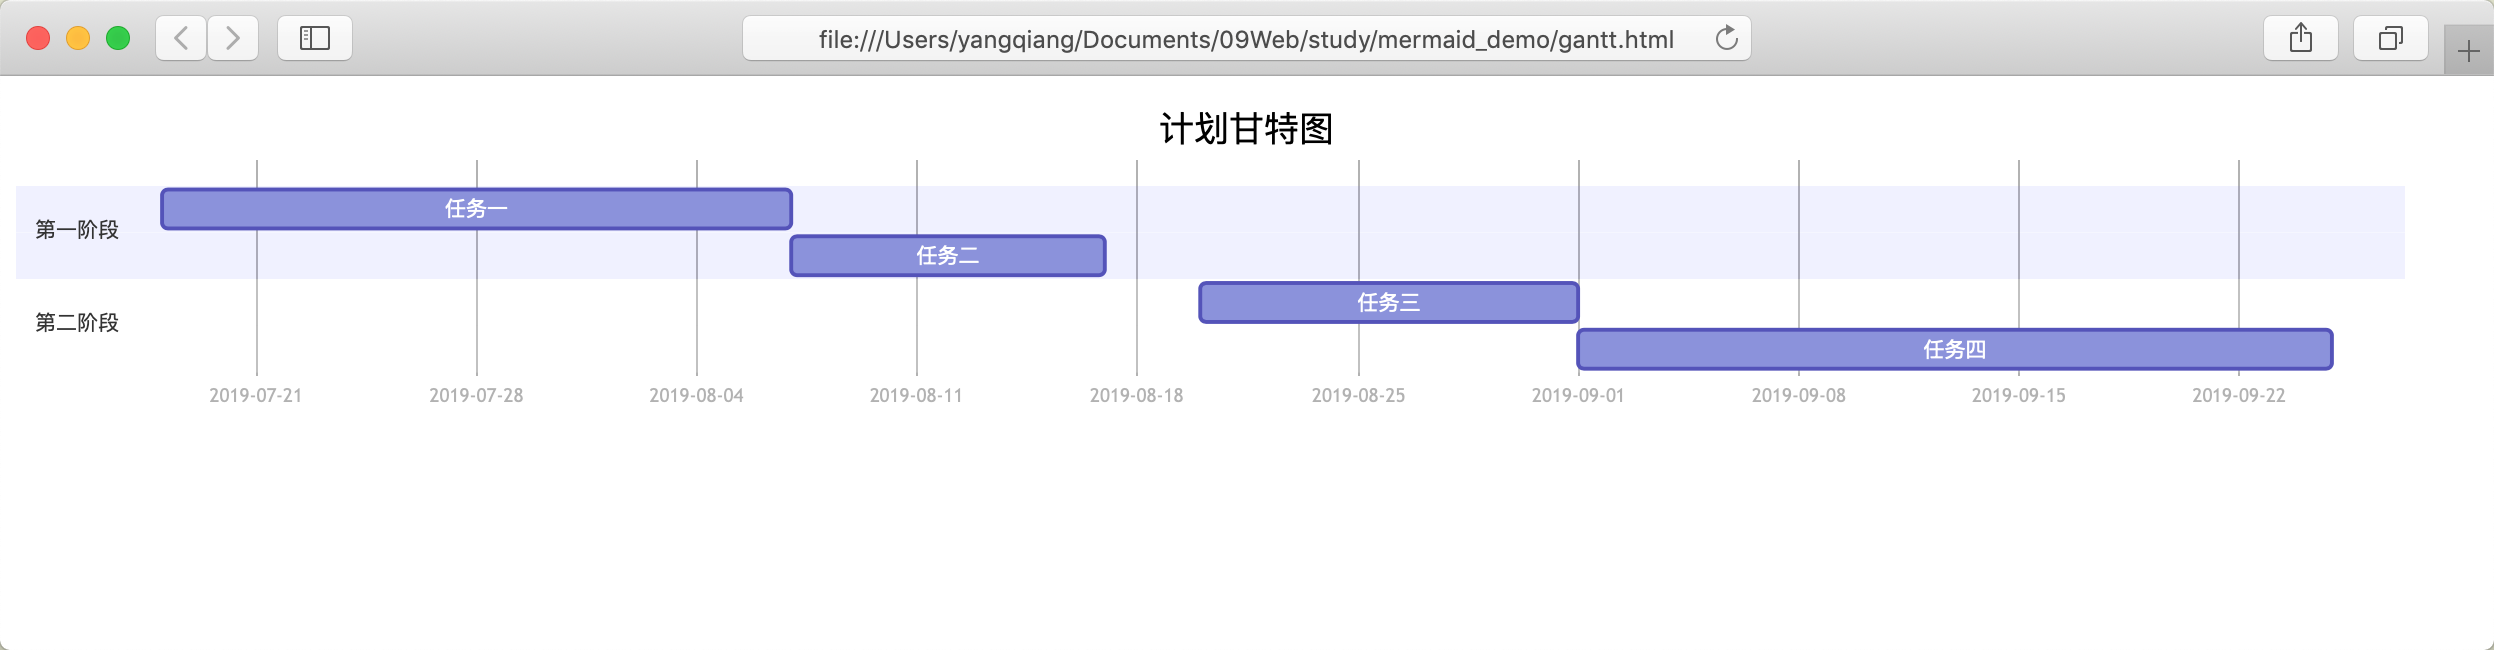

----